# Darkflow - YOLO Object Detection
## 1.400 Capstone 1 - 3S04
Library taken from https://github.com/thtrieu/darkflow
Modified by Martin Tan

In [1]:
from darkflow.net.build import TFNet
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import time
import pathlib as pl

%matplotlib inline
%load_ext autoreload
%autoreload
%reload_ext autoreload

# Helpful options list
```
Arguments:
  --help, --h, -h  show this super helpful message and exit
  --imgdir         path to testing directory with images
  --binary         path to .weights directory
  --config         path to .cfg directory
  --dataset        path to dataset directory
  --labels         path to labels file
  --backup         path to backup folder
  --summary        path to TensorBoard summaries directory
  --annotation     path to annotation directory
  --threshold      detection threshold
  --model          configuration of choice
  --trainer        training algorithm
  --momentum       applicable for rmsprop and momentum optimizers
  --verbalise      say out loud while building graph
  --train          train the whole net
  --load           how to initialize the net? Either from .weights or a checkpoint, or even from scratch
  --savepb         save net and weight to a .pb file
  --gpu            how much gpu (from 0.0 to 1.0)
  --gpuName        GPU device name
  --lr             learning rate
  --keep           Number of most recent training results to save
  --batch          batch size
  --epoch          number of epoch
  --save           save checkpoint every ? training examples
  --demo           demo on webcam
  --queue          process demo in batch
  --json           Outputs bounding box information in json format.
  --saveVideo      Records video from input video or camera
  --pbLoad         path to .pb protobuf file (metaLoad must also be specified)
  --metaLoad       path to .meta file generated during --savepb that corresponds to .pb file
  ```
  
# MODIFICATION - Transfer Learning
Modified build.py @ line 59 to 60 to subtract ```self.FLAGS.transfer```

# Training the net - Transfer Learning
We first try using self annotated data and deactivate the training of everything except the last 3 layers.

In [56]:
options = {"model": "cfg/tiny-yolo-voc-custom.cfg",
           "load": "bin/tiny-yolo-voc.weights",
           "gpu": 0.8, #fraction of gpu to use, best is 0.8
           "threshold": 0.0, #set to 0 to show all bboxes
           "trainer" : "adam", #optimisation algorithm
           "lr" : 0.002, #learning rate
           "epoch" : 20,
           "save" : 100, #save checkpoint every
           "transfer" : 18, #how many layers not to train
           "train": True,
           "dataset" : "./data/images", #images
           "annotation" : "./data/annotations" #ground truths
          }
tfnet = TFNet(options)
# tfnet.load_from_ckpt()

Parsing ./cfg/tiny-yolo-voc.cfg
Parsing cfg/tiny-yolo-voc-custom.cfg
Loading bin/tiny-yolo-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.027992725372314453s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Nope  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Nope  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Nope  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Nope  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Nope  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Nope  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Nope  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Nope  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Nope  | conv 3x3p1_1  +bn

In [57]:
start = time.time()
tfnet.train()
end = time.time()
print("Training completed in {0:2f} seconds.".format(end-start))


cfg/tiny-yolo-voc-custom.cfg parsing ./data/annotations
Parsing for ['gun', 'rifle', 'hat', 'eyewear'] 
[====================>]100%  armas (99).xml
Statistics:
gun: 124
hat: 17
rifle: 9
eyewear: 10
Dataset size: 100
Dataset of 100 instance(s)
Training statistics: 
	Learning rate : 0.002
	Batch size    : 16
	Epoch number  : 20
	Backup every  : 100
step 1 - loss 110.6552734375 - moving ave loss 110.65527343750001
step 2 - loss 69.29052734375 - moving ave loss 106.51879882812501
step 3 - loss 42.25225830078125 - moving ave loss 100.09214477539065
step 4 - loss 11.760417938232422 - moving ave loss 91.25897209167483
step 5 - loss 7.104640960693359 - moving ave loss 82.84353897857669
step 6 - loss 4.250384330749512 - moving ave loss 74.98422351379396
Checkpoint at step 6
Finish 1 epoch(es)
step 7 - loss 3.894798994064331 - moving ave loss 67.87528106182101
step 8 - loss 4.547098636627197 - moving ave loss 61.54246281930163
step 9 - loss 3.734790325164795 - moving ave loss 55.76169556988795


step 104 - loss 2.6367034912109375 - moving ave loss 2.3488148020234876
step 105 - loss 1.942089557647705 - moving ave loss 2.3081422775859095
step 106 - loss 1.9639208316802979 - moving ave loss 2.2737201329953485
step 107 - loss 4.128711223602295 - moving ave loss 2.4592192420560433
step 108 - loss 2.0951950550079346 - moving ave loss 2.4228168233512326
Checkpoint at step 108
Finish 18 epoch(es)
step 109 - loss 1.224114179611206 - moving ave loss 2.3029465589772298
step 110 - loss 1.8416320085525513 - moving ave loss 2.2568151039347617
step 111 - loss 2.4684197902679443 - moving ave loss 2.27797557256808
step 112 - loss 3.9761736392974854 - moving ave loss 2.4477953792410205
step 113 - loss 2.376375675201416 - moving ave loss 2.44065340883706
step 114 - loss 1.2942681312561035 - moving ave loss 2.3260148810789643
Checkpoint at step 114
Finish 19 epoch(es)
step 115 - loss 1.6232378482818604 - moving ave loss 2.2557371777992543
step 116 - loss 4.515277862548828 - moving ave loss 2.4816

In [ ]:
tfnet.load_from_ckpt(120)

In [14]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

# Some references

Steps followed to train:
https://towardsdatascience.com/yolov2-to-detect-your-own-objects-soccer-ball-using-darkflow-a4f98d5ce5bf
https://github.com/thtrieu/darkflow

Display function:
https://towardsdatascience.com/yolov2-object-detection-using-darkflow-83db6aa5cf5f

# Test Images

[{'label': 'gun', 'confidence': 0.99999946, 'topleft': {'x': 280, 'y': 397}, 'bottomright': {'x': 319, 'y': 399}}, {'label': 'gun', 'confidence': 0.8146333, 'topleft': {'x': 272, 'y': 396}, 'bottomright': {'x': 327, 'y': 402}}, {'label': 'gun', 'confidence': 0.9984382, 'topleft': {'x': 200, 'y': 0}, 'bottomright': {'x': 399, 'y': 865}}, {'label': 'gun', 'confidence': 0.9936854, 'topleft': {'x': 241, 'y': 120}, 'bottomright': {'x': 359, 'y': 700}}]


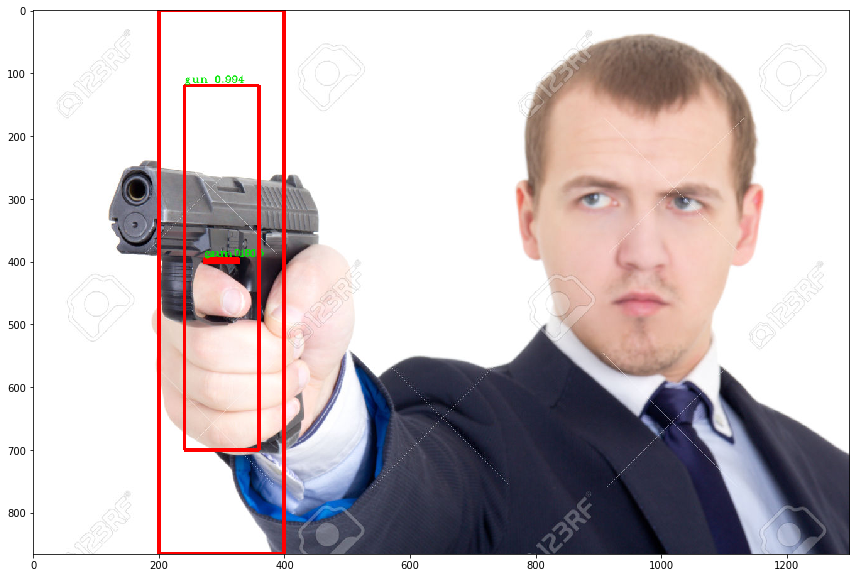

In [94]:
imgcv = imageio.imread("./testimg/armas (118).jpg")
# imgcv = cv2.cvtColor(imgcv, cv2.COLOR_BGR2RGB)

result = tfnet.return_predict(imgcv)
print(result)

_, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(imgcv, result))

[{'label': 'gun', 'confidence': 0.99989575, 'topleft': {'x': 306, 'y': 373}, 'bottomright': {'x': 306, 'y': 373}}, {'label': 'gun', 'confidence': 0.9490936, 'topleft': {'x': 298, 'y': 371}, 'bottomright': {'x': 311, 'y': 376}}]
[]
[{'label': 'gun', 'confidence': 0.9669313, 'topleft': {'x': 173, 'y': 115}, 'bottomright': {'x': 173, 'y': 115}}, {'label': 'eyewear', 'confidence': 0.8725317, 'topleft': {'x': 311, 'y': 69}, 'bottomright': {'x': 311, 'y': 69}}, {'label': 'eyewear', 'confidence': 0.99997574, 'topleft': {'x': 310, 'y': 77}, 'bottomright': {'x': 310, 'y': 78}}]
[{'label': 'gun', 'confidence': 1.0, 'topleft': {'x': 169, 'y': 138}, 'bottomright': {'x': 169, 'y': 138}}, {'label': 'gun', 'confidence': 0.99943215, 'topleft': {'x': 135, 'y': 137}, 'bottomright': {'x': 141, 'y': 139}}, {'label': 'gun', 'confidence': 1.0, 'topleft': {'x': 146, 'y': 138}, 'bottomright': {'x': 147, 'y': 138}}, {'label': 'eyewear', 'confidence': 0.8876214, 'topleft': {'x': 333, 'y': 47}, 'bottomright': {'

ValueError: not enough values to unpack (expected 3, got 2)

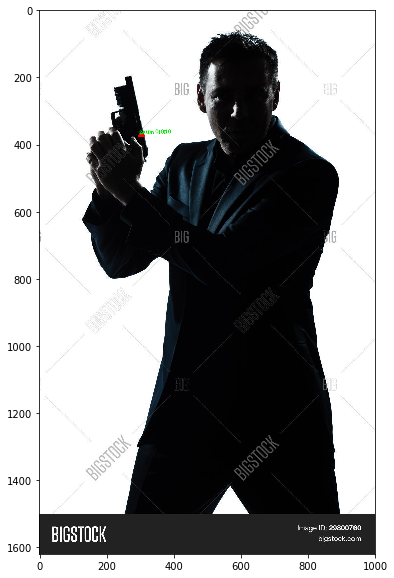

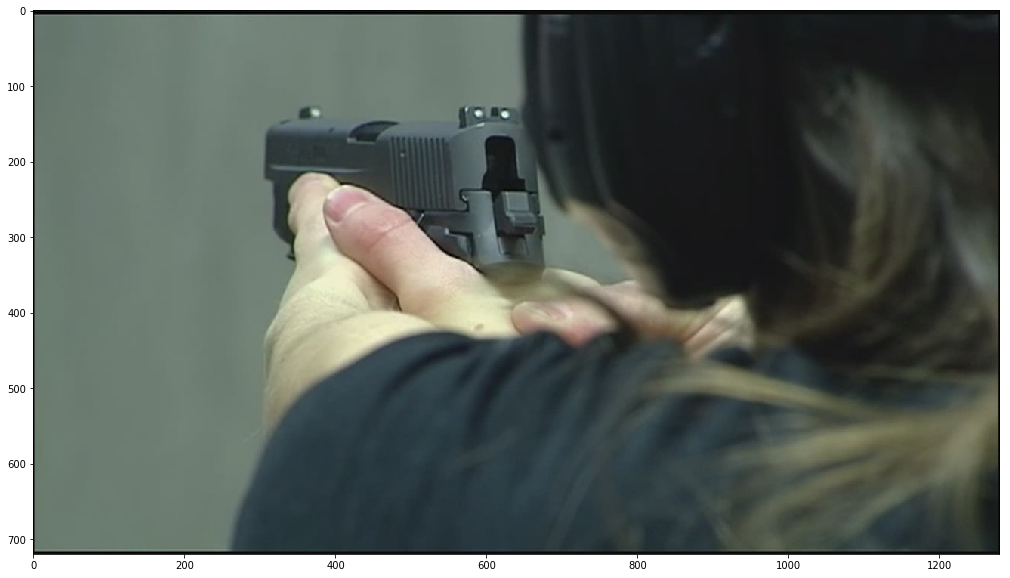

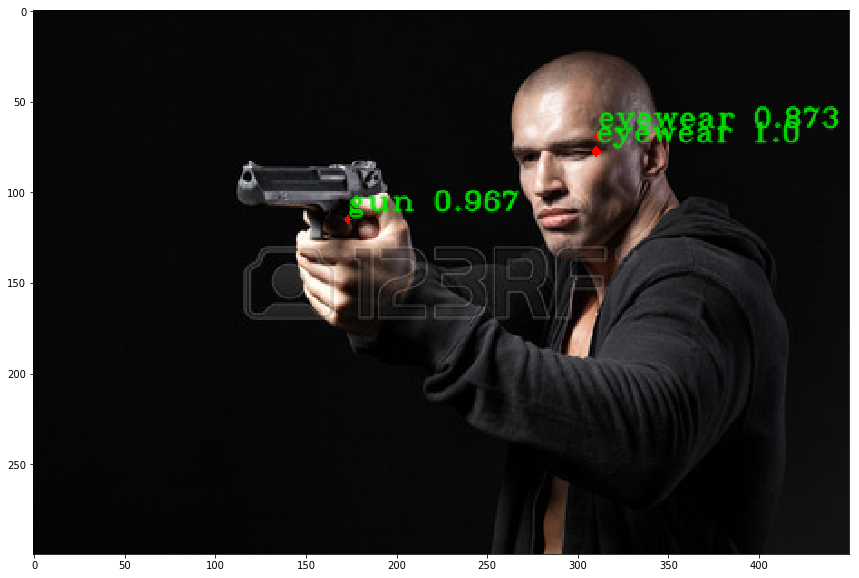

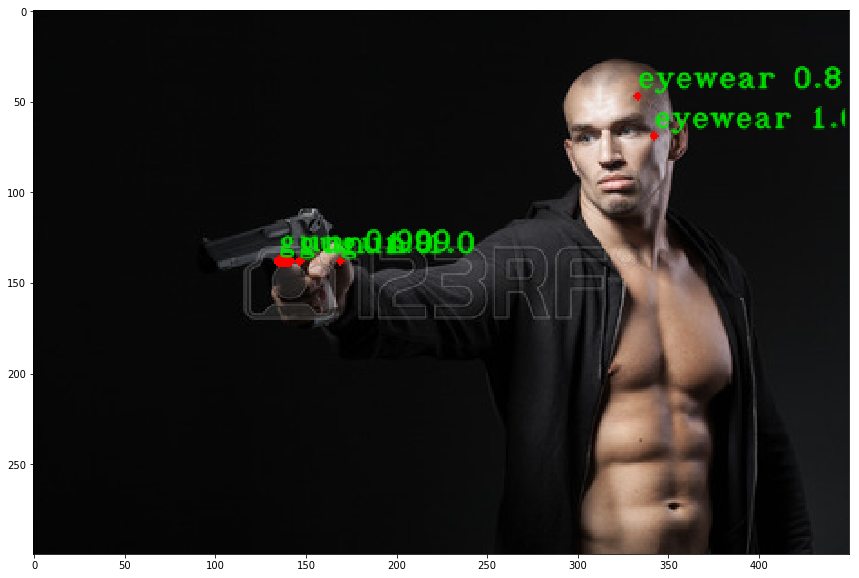

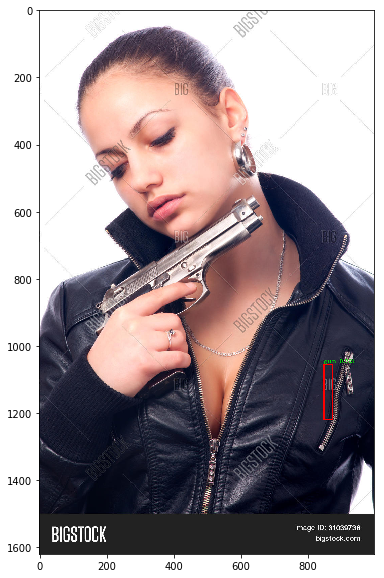

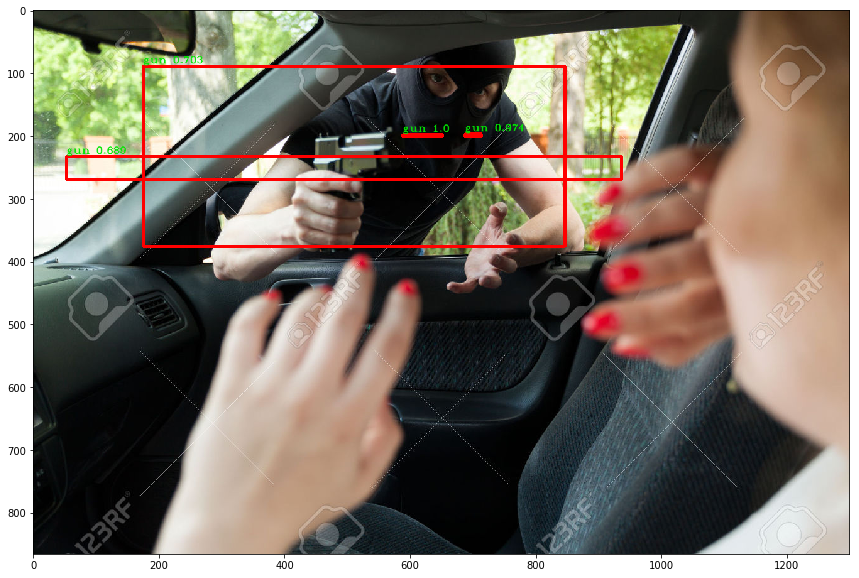

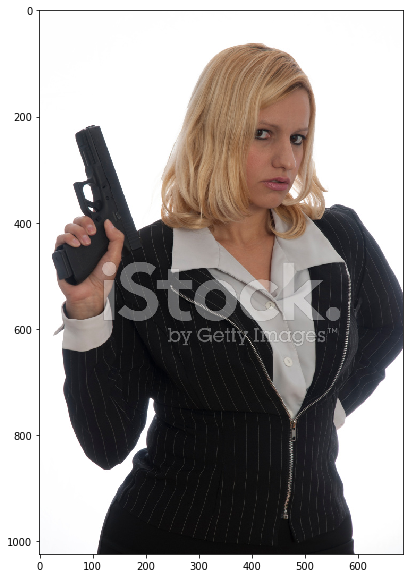

In [101]:
subdir = "testimg"
for entry in os.scandir(subdir):
    if not entry.name.startswith('.') and entry.is_file() and entry.name.split(".")[-1].lower() == "jpg":
        dir = '/'.join([subdir, entry.name])
        img = imageio.imread(dir)

        result = tfnet.return_predict(img)
        print(result)

        _, ax = plt.subplots(figsize=(20, 10))
        ax.imshow(boxing(img, result))

In [3]:
options = {"model": "cfg/tiny-yolo-voc-open_images.cfg",
           "load": "bin/tiny-yolo-voc.weights",
           "gpu": 0.8, #fraction of gpu to use, best is 0.8
           "threshold": 0.0, #set to 0 to show all bboxes
           "trainer" : "adam", #optimisation algorithm
           "lr" : 0.003, #learning rate
           "epoch" : 5,
           "save" : 5000, #save checkpoint every
           "transfer" : 15, #how many layers not to train
           "train": True,
           "dataset" : "D:/open_images/images", #images
           "annotation" : "D:/open_images/annotations", #ground truths
           "batch" : 50
          }

tfnet = TFNet(options)

Parsing ./cfg/tiny-yolo-voc.cfg
Parsing cfg/tiny-yolo-voc-open_images.cfg
Loading bin/tiny-yolo-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.021994829177856445s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |    N   | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |    N   | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |    N   | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |    N   | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |    N   | conv 3x3p1_1

In [55]:
classes = ['Person', 'Human face', 'Hat', 'Sunglasses', 'Knife', 'Handgun', 'Rifle', 'Weapon', 'Jacket', 'Shorts', 'Jeans', 'Skirt']
print(len(classes))
print("we are quite screwed.")

12
we are quite screwed.


In [4]:
start = time.time()
tfnet.train()
end = time.time()
print("Training completed in {0:2f} seconds.".format(end-start))


cfg/tiny-yolo-voc-open_images.cfg parsing D:/open_images/annotations
Parsing for ['Person', 'Human face', 'Hat', 'Sunglasses', 'Knife', 'Handgun', 'Rifle', 'Weapon', 'Jacket', 'Shorts', 'Jeans', 'Skirt'] 
[====================>]100%  armas (99).xml.xml
Statistics:
Person: 18268
Human face: 16227
Jacket: 865
Jeans: 1944
Sunglasses: 858
Shorts: 814
Rifle: 218
Hat: 430
Skirt: 123
Handgun: 158
Knife: 38
Weapon: 73
Dataset size: 11022
Dataset of 11022 instance(s)
Training statistics: 
	Learning rate : 0.003
	Batch size    : 50
	Epoch number  : 5
	Backup every  : 5000
step 1 - loss 109.57547760009766 - moving ave loss 109.57547760009766
step 2 - loss 61.32868957519531 - moving ave loss 104.75079879760743
step 3 - loss 40.94336700439453 - moving ave loss 98.37005561828614
step 4 - loss 15.510915756225586 - moving ave loss 90.08414163208009
step 5 - loss 13.044766426086426 - moving ave loss 82.38020411148074
step 6 - loss 10.282526969909668 - moving ave loss 75.17043639732363
step 7 - loss 11

step 111 - loss 8.105942726135254 - moving ave loss 7.7721945148469445
step 112 - loss 9.86962890625 - moving ave loss 7.98193795398725
step 113 - loss 11.997675895690918 - moving ave loss 8.383511748157616
step 114 - loss 8.718883514404297 - moving ave loss 8.417048924782284
step 115 - loss 7.027663707733154 - moving ave loss 8.27811040307737
step 116 - loss 7.867978572845459 - moving ave loss 8.23709722005418
step 117 - loss 9.357250213623047 - moving ave loss 8.349112519411067
step 118 - loss 6.322615146636963 - moving ave loss 8.146462782133657
step 119 - loss 6.228087902069092 - moving ave loss 7.954625294127201
step 120 - loss 8.47810173034668 - moving ave loss 8.006972937749149
step 121 - loss 11.744843482971191 - moving ave loss 8.380759992271352
step 122 - loss 9.629910469055176 - moving ave loss 8.505675039949736
step 123 - loss 8.498547554016113 - moving ave loss 8.504962291356374
step 124 - loss 5.163006782531738 - moving ave loss 8.170766740473912
step 125 - loss 6.1247553

step 228 - loss 5.348504066467285 - moving ave loss 6.689340103639212
step 229 - loss 5.389650344848633 - moving ave loss 6.559371127760154
step 230 - loss 7.52575159072876 - moving ave loss 6.656009174057015
step 231 - loss 8.321261405944824 - moving ave loss 6.822534397245796
step 232 - loss 8.305256843566895 - moving ave loss 6.970806641877906
step 233 - loss 8.586268424987793 - moving ave loss 7.132352820188895
step 234 - loss 6.318638324737549 - moving ave loss 7.05098137064376
step 235 - loss 5.989336013793945 - moving ave loss 6.944816834958779
step 236 - loss 7.103674411773682 - moving ave loss 6.96070259264027
step 237 - loss 6.374363422393799 - moving ave loss 6.902068675615623
step 238 - loss 8.455917358398438 - moving ave loss 7.057453543893905
step 239 - loss 5.82000732421875 - moving ave loss 6.93370892192639
step 240 - loss 6.957607746124268 - moving ave loss 6.9360988043461775
step 241 - loss 5.249073505401611 - moving ave loss 6.767396274451721
step 242 - loss 6.470546

step 345 - loss 8.422082901000977 - moving ave loss 7.087645555128704
step 346 - loss 7.023554801940918 - moving ave loss 7.081236479809926
step 347 - loss 8.027374267578125 - moving ave loss 7.175850258586746
step 348 - loss 7.4868245124816895 - moving ave loss 7.2069476839762405
step 349 - loss 7.399680137634277 - moving ave loss 7.226220929342045
step 350 - loss 6.877955436706543 - moving ave loss 7.191394380078495
step 351 - loss 6.120357513427734 - moving ave loss 7.084290693413418
step 352 - loss 4.5047173500061035 - moving ave loss 6.826333359072687
step 353 - loss 6.423711776733398 - moving ave loss 6.786071200838759
step 354 - loss 5.284158229827881 - moving ave loss 6.6358799037376714
step 355 - loss 6.2424774169921875 - moving ave loss 6.596539655063124
step 356 - loss 6.859157085418701 - moving ave loss 6.622801398098682
step 357 - loss 7.290811538696289 - moving ave loss 6.689602412158443
step 358 - loss 5.0781145095825195 - moving ave loss 6.5284536219008515
step 359 - lo

step 524 - loss nan - moving ave loss nan
step 525 - loss nan - moving ave loss nan
step 526 - loss nan - moving ave loss nan
step 527 - loss nan - moving ave loss nan
step 528 - loss nan - moving ave loss nan
step 529 - loss nan - moving ave loss nan
step 530 - loss nan - moving ave loss nan
step 531 - loss nan - moving ave loss nan
step 532 - loss nan - moving ave loss nan
step 533 - loss nan - moving ave loss nan
step 534 - loss nan - moving ave loss nan
step 535 - loss nan - moving ave loss nan
step 536 - loss nan - moving ave loss nan
step 537 - loss nan - moving ave loss nan
step 538 - loss nan - moving ave loss nan
step 539 - loss nan - moving ave loss nan
step 540 - loss nan - moving ave loss nan
step 541 - loss nan - moving ave loss nan
step 542 - loss nan - moving ave loss nan
step 543 - loss nan - moving ave loss nan
step 544 - loss nan - moving ave loss nan
step 545 - loss nan - moving ave loss nan
step 546 - loss nan - moving ave loss nan
step 547 - loss nan - moving ave l

KeyboardInterrupt: 

In [25]:
options = {"model": "cfg/tiny-yolo-voc-open_images.cfg",
           "load": -1,
           "gpu": 0.8, #fraction of gpu to use, best is 0.8
           "threshold": 0.0, #set to 0 to show all bboxes
           "transfer" : 0 #how many layers not to train
          }

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-open_images.cfg
Loading None ...
Finished in 0.0010027885437011719s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |    Y   | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |    Y   | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |    Y   | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |    Y   | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |    Y   | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |    Y   | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |    Y   | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |    Y   | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |    Y   | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |    Y   | maxp 2x2p0_2                     

AssertionError: Cannot find and load 0-convolutional/biases:0

[]
[]
[]
[]
[]
[]
[]
[]
[]


ValueError: not enough values to unpack (expected 3, got 2)

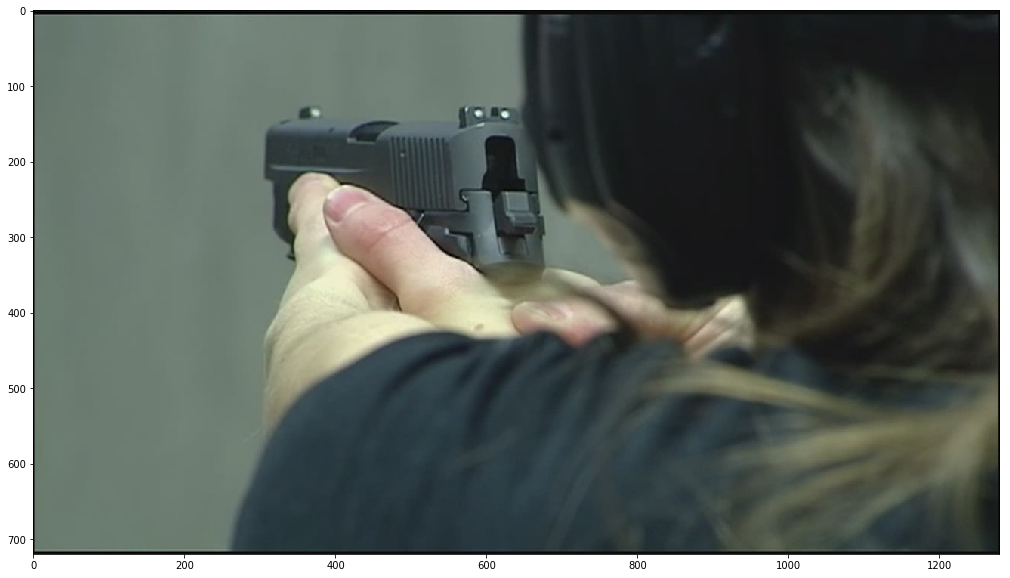

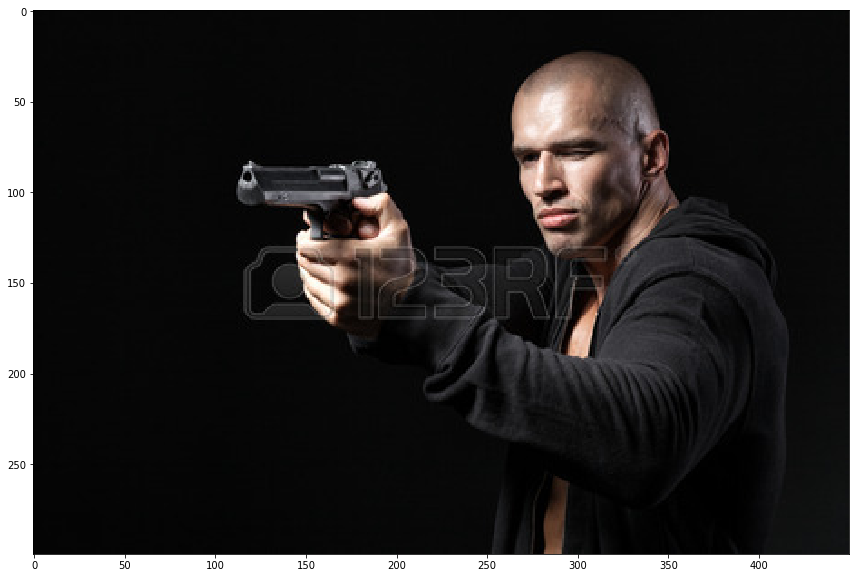

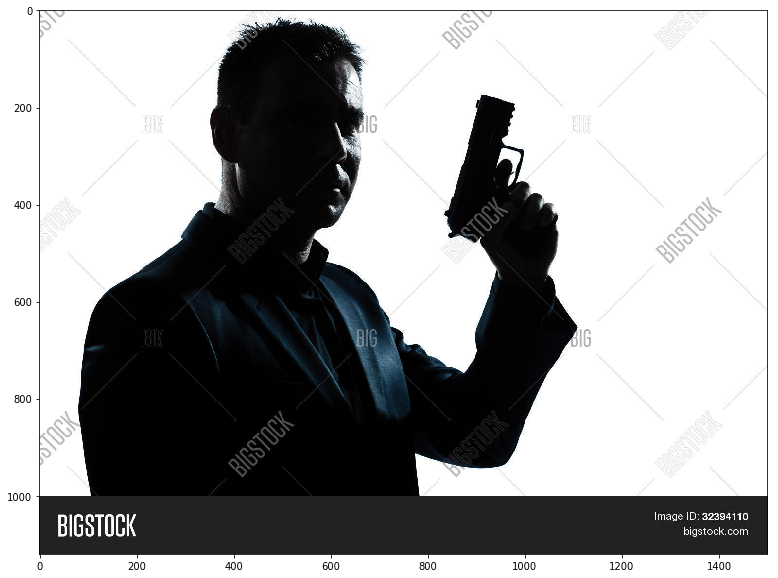

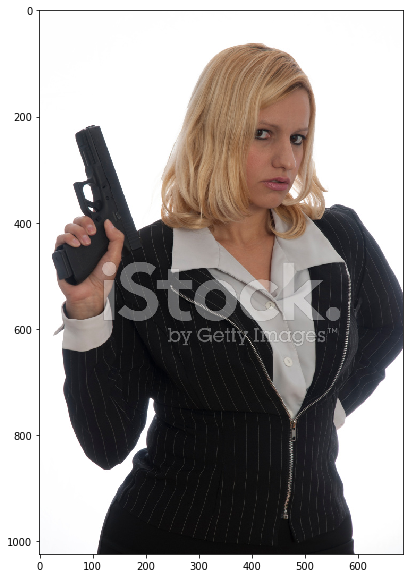

In [22]:
subdir = "testimg"
for entry in os.scandir(subdir):
    if not entry.name.startswith('.') and entry.is_file() and entry.name.split(".")[-1].lower() == "jpg":
        dir = '/'.join([subdir, entry.name])
        img = imageio.imread(dir)

        result = tfnet.return_predict(img)
        print(result)

        _, ax = plt.subplots(figsize=(20, 10))
        ax.imshow(boxing(img, result))

In [7]:
path = pl.Path(r'C:\Users\Martin\OneDrive - Singapore University of Technology and Design\SUTD Term 7\50.035 Computer Vision\1D\darkflow')
os.chdir(path)
options = {"model": "cfg/tiny-yolo-voc-open_images.cfg",
           "load": 300,
           "gpu": 0.75, #fraction of gpu to use, best is 0.8
           "threshold": 0.0, #set to 0 to show all bboxes
           "trainer" : "adam", #optimisation algorithm
           "lr" : 0.0005, #learning rate
           "epoch" : 5,
           "save" : 5000, #save checkpoint every
           "transfer" : 15, #how many layers not to train
           "train": True,
           "dataset" : "D:/open_images/images", #images
           "annotation" : "D:/open_images/annotations", #ground truths
           "batch" : 25
          }

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-open_images.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |    N   | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |    N   | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |    N   | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |    N   | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |    N   | maxp 2x2p0_2                     | (?, 13, 13, 256)

In [59]:
start = time.time()
tfnet.train()
end = time.time()
print("Training completed in {0:2f} seconds.".format(end-start))


cfg/tiny-yolo-voc-open_images.cfg parsing D:/open_images/annotations
Parsing for ['Person', 'Human face', 'Hat', 'Sunglasses', 'Knife', 'Handgun', 'Rifle', 'Weapon', 'Jacket', 'Shorts', 'Jeans', 'Skirt'] 
[====================>]100%  armas (99).xml.xml
Statistics:
Person: 18268
Human face: 16227
Jacket: 865
Jeans: 1944
Sunglasses: 858
Shorts: 814
Rifle: 218
Hat: 430
Skirt: 123
Handgun: 158
Knife: 38
Weapon: 73
Dataset size: 11022
Dataset of 11022 instance(s)
Training statistics: 
	Learning rate : 0.001
	Batch size    : 50
	Epoch number  : 1
	Backup every  : 5000
step 301 - loss 8.852754592895508 - moving ave loss 8.852754592895508
step 302 - loss 11.205204963684082 - moving ave loss 9.087999629974366
step 303 - loss 11.740220069885254 - moving ave loss 9.353221673965455
step 304 - loss 7.772891044616699 - moving ave loss 9.195188611030579
step 305 - loss 8.798564910888672 - moving ave loss 9.15552624101639
step 306 - loss 8.699358940124512 - moving ave loss 9.109909510927203
step 307 

step 409 - loss 11.171187400817871 - moving ave loss 9.07348468360189
step 410 - loss 7.345210075378418 - moving ave loss 8.900657222779543
step 411 - loss 8.37533950805664 - moving ave loss 8.848125451307252
step 412 - loss 5.5709919929504395 - moving ave loss 8.520412105471571
step 413 - loss 8.014382362365723 - moving ave loss 8.469809131160986
step 414 - loss 8.824779510498047 - moving ave loss 8.505306169094691


InternalError: GPU sync failed

In [8]:
start = time.time()
tfnet.train()
end = time.time()
print("Training completed in {0:2f} seconds.".format(end-start))


cfg/tiny-yolo-voc-open_images.cfg parsing D:/open_images/annotations
Parsing for ['Person', 'Human face', 'Hat', 'Sunglasses', 'Knife', 'Handgun', 'Rifle', 'Weapon', 'Jacket', 'Shorts', 'Jeans', 'Skirt'] 
[===================>]99%  armas (34).xmll1.xmlTraining statistics: 
	Learning rate : 0.0005
	Batch size    : 25
	Epoch number  : 5
	Backup every  : 5000
step 301 - loss 7.361398696899414 - moving ave loss 7.361398696899414
step 302 - loss 8.372998237609863 - moving ave loss 7.462558650970459
step 303 - loss 7.97636079788208 - moving ave loss 7.513938865661621
step 304 - loss 7.695509433746338 - moving ave loss 7.532095922470093
step 305 - loss 9.684062957763672 - moving ave loss 7.747292625999451
step 306 - loss 8.76099681854248 - moving ave loss 7.848663045253755
step 307 - loss 9.918865203857422 - moving ave loss 8.05568326111412
step 308 - loss 7.439350605010986 - moving ave loss 7.994049995503808
step 309 - loss 8.589378356933594 - moving ave loss 8.053582831646787
step 310 - lo

step 413 - loss 7.1387858390808105 - moving ave loss 8.652241075373356
step 414 - loss 8.912681579589844 - moving ave loss 8.678285125795005
step 415 - loss 14.095322608947754 - moving ave loss 9.219988874110282
step 416 - loss 7.278220176696777 - moving ave loss 9.02581200436893
step 417 - loss 13.668771743774414 - moving ave loss 9.490107978309478
step 418 - loss 8.288660049438477 - moving ave loss 9.369963185422378
step 419 - loss 12.733254432678223 - moving ave loss 9.706292310147964
step 420 - loss 8.507424354553223 - moving ave loss 9.58640551458849
step 421 - loss 10.4517240524292 - moving ave loss 9.67293736837256
step 422 - loss 9.388601303100586 - moving ave loss 9.644503761845362
step 423 - loss 10.801654815673828 - moving ave loss 9.76021886722821
step 424 - loss 10.964447975158691 - moving ave loss 9.880641778021257
step 425 - loss 10.24730110168457 - moving ave loss 9.91730771038759
step 426 - loss 6.628293991088867 - moving ave loss 9.588406338457718
step 427 - loss 7.22

step 530 - loss 8.815391540527344 - moving ave loss 8.531766963914945
step 531 - loss 8.253684997558594 - moving ave loss 8.503958767279311
step 532 - loss 7.159368991851807 - moving ave loss 8.369499789736562
step 533 - loss 8.952797889709473 - moving ave loss 8.427829599733853
step 534 - loss 8.381505012512207 - moving ave loss 8.423197141011688
step 535 - loss 8.907258033752441 - moving ave loss 8.471603230285764
step 536 - loss 14.158430099487305 - moving ave loss 9.040285917205917
step 537 - loss 8.369549751281738 - moving ave loss 8.9732123006135
step 538 - loss 7.854642391204834 - moving ave loss 8.861355309672634
step 539 - loss 7.2795233726501465 - moving ave loss 8.703172115970386
step 540 - loss 7.290903568267822 - moving ave loss 8.56194526120013
step 541 - loss 6.1035542488098145 - moving ave loss 8.316106159961098
step 542 - loss 11.367961883544922 - moving ave loss 8.62129173231948
step 543 - loss 10.864228248596191 - moving ave loss 8.845585383947151
step 544 - loss 10.

step 648 - loss 8.021204948425293 - moving ave loss 9.727797464831864
step 649 - loss 8.078444480895996 - moving ave loss 9.56286216643828
step 650 - loss 7.526392936706543 - moving ave loss 9.359215243465107
step 651 - loss 12.377306938171387 - moving ave loss 9.661024412935735
step 652 - loss 10.335404396057129 - moving ave loss 9.728462411247873
step 653 - loss 8.422940254211426 - moving ave loss 9.59791019554423
step 654 - loss 10.9027738571167 - moving ave loss 9.728396561701476
step 655 - loss 8.935153007507324 - moving ave loss 9.64907220628206
step 656 - loss 12.238862037658691 - moving ave loss 9.908051189419723
step 657 - loss 9.492995262145996 - moving ave loss 9.86654559669235
step 658 - loss 9.06322956085205 - moving ave loss 9.78621399310832
step 659 - loss 11.816641807556152 - moving ave loss 9.989256774553102
step 660 - loss 7.649920463562012 - moving ave loss 9.755323143453994
step 661 - loss 9.131254196166992 - moving ave loss 9.692916248725295
step 662 - loss 6.86480

step 765 - loss 7.328803539276123 - moving ave loss 8.587990691558032
step 766 - loss 8.53222942352295 - moving ave loss 8.582414564754524
step 767 - loss 10.234898567199707 - moving ave loss 8.747662964999043
step 768 - loss 8.446977615356445 - moving ave loss 8.717594430034783
step 769 - loss 8.275769233703613 - moving ave loss 8.673411910401667
step 770 - loss 10.474562644958496 - moving ave loss 8.85352698385735
step 771 - loss 8.252974510192871 - moving ave loss 8.793471736490902
step 772 - loss 11.64181137084961 - moving ave loss 9.078305699926773
step 773 - loss 7.669641017913818 - moving ave loss 8.937439231725477
step 774 - loss 7.688068866729736 - moving ave loss 8.812502195225903
step 775 - loss 9.512935638427734 - moving ave loss 8.882545539546086
step 776 - loss 10.199532508850098 - moving ave loss 9.014244236476488
step 777 - loss 6.0788893699646 - moving ave loss 8.720708749825299
step 778 - loss 9.150200843811035 - moving ave loss 8.763657959223872
step 779 - loss 6.068

step 883 - loss 8.105384826660156 - moving ave loss 9.408744555357098
step 884 - loss 7.118289470672607 - moving ave loss 9.179699046888649
step 885 - loss 11.868317604064941 - moving ave loss 9.448560902606278
step 886 - loss 11.19251823425293 - moving ave loss 9.622956635770944
step 887 - loss 6.456143379211426 - moving ave loss 9.30627531011499
step 888 - loss 8.592321395874023 - moving ave loss 9.234879918690893
step 889 - loss 13.074063301086426 - moving ave loss 9.618798256930447
step 890 - loss 9.705201148986816 - moving ave loss 9.627438546136084
step 891 - loss 9.676058769226074 - moving ave loss 9.632300568445084
step 892 - loss 10.903007507324219 - moving ave loss 9.759371262332996
step 893 - loss 9.536751747131348 - moving ave loss 9.737109310812832
step 894 - loss 6.458731651306152 - moving ave loss 9.409271544862163
step 895 - loss 7.294399261474609 - moving ave loss 9.197784316523407
step 896 - loss 6.785807132720947 - moving ave loss 8.956586598143161
step 897 - loss 6.

step 1000 - loss 12.28011703491211 - moving ave loss 8.66162699624589
step 1001 - loss 8.908546447753906 - moving ave loss 8.686318941396692
step 1002 - loss 7.595914363861084 - moving ave loss 8.577278483643132
step 1003 - loss 8.469442367553711 - moving ave loss 8.566494872034191
step 1004 - loss 12.721344947814941 - moving ave loss 8.981979879612267
step 1005 - loss 11.670292854309082 - moving ave loss 9.250811177081948
step 1006 - loss 10.685766220092773 - moving ave loss 9.394306681383032
step 1007 - loss 9.08259391784668 - moving ave loss 9.363135405029396
step 1008 - loss 9.96300983428955 - moving ave loss 9.423122847955414
step 1009 - loss 8.751134872436523 - moving ave loss 9.355924050403525
step 1010 - loss 12.423937797546387 - moving ave loss 9.662725425117811
step 1011 - loss 11.186479568481445 - moving ave loss 9.815100839454175
step 1012 - loss 9.078461647033691 - moving ave loss 9.741436920212125
step 1013 - loss 11.264482498168945 - moving ave loss 9.893741478007808
ste

step 1115 - loss 11.689858436584473 - moving ave loss 8.782351532827489
step 1116 - loss 7.039755821228027 - moving ave loss 8.608091961667544
step 1117 - loss 11.251938819885254 - moving ave loss 8.872476647489314
step 1118 - loss 5.604491710662842 - moving ave loss 8.545678153806668
step 1119 - loss 8.766844749450684 - moving ave loss 8.56779481337107
step 1120 - loss 9.082247734069824 - moving ave loss 8.619240105440944
step 1121 - loss 9.885790824890137 - moving ave loss 8.745895177385863
step 1122 - loss 10.776017189025879 - moving ave loss 8.948907378549865
step 1123 - loss 6.605772495269775 - moving ave loss 8.714593890221856
step 1124 - loss 8.291250228881836 - moving ave loss 8.672259524087854
step 1125 - loss 12.9784574508667 - moving ave loss 9.102879316765739
step 1126 - loss 8.44284439086914 - moving ave loss 9.036875824176079
step 1127 - loss 8.175902366638184 - moving ave loss 8.95077847842229
step 1128 - loss 7.33074951171875 - moving ave loss 8.788775581751937
step 112

step 1231 - loss 9.034972190856934 - moving ave loss 8.963506392728046
step 1232 - loss 8.228864669799805 - moving ave loss 8.890042220435223
step 1233 - loss 13.346291542053223 - moving ave loss 9.335667152597024
step 1234 - loss 10.552035331726074 - moving ave loss 9.457303970509928
step 1235 - loss 7.317033290863037 - moving ave loss 9.24327690254524
step 1236 - loss 7.593989849090576 - moving ave loss 9.078348197199775
step 1237 - loss 7.084387302398682 - moving ave loss 8.878952107719666
step 1238 - loss 16.603363037109375 - moving ave loss 9.651393200658637
step 1239 - loss 10.240641593933105 - moving ave loss 9.710318039986083
step 1240 - loss 9.430756568908691 - moving ave loss 9.682361892878344
step 1241 - loss 8.748016357421875 - moving ave loss 9.588927339332697
step 1242 - loss 9.96958065032959 - moving ave loss 9.626992670432386
step 1243 - loss 9.254964828491211 - moving ave loss 9.58978988623827
step 1244 - loss 8.074655532836914 - moving ave loss 9.438276450898135
step 

step 1346 - loss 9.648563385009766 - moving ave loss 10.025105227886458
step 1347 - loss 9.986454010009766 - moving ave loss 10.021240106098789
step 1348 - loss 6.41771125793457 - moving ave loss 9.660887221282367
step 1349 - loss 7.188284397125244 - moving ave loss 9.413626938866654
step 1350 - loss 10.30725383758545 - moving ave loss 9.502989628738534
step 1351 - loss 8.82444953918457 - moving ave loss 9.435135619783138
step 1352 - loss 6.253180980682373 - moving ave loss 9.116940155873062
step 1353 - loss 8.9633207321167 - moving ave loss 9.101578213497426
step 1354 - loss 6.05097770690918 - moving ave loss 8.796518162838602
step 1355 - loss 9.187252044677734 - moving ave loss 8.835591551022516
step 1356 - loss 12.086261749267578 - moving ave loss 9.160658570847023
step 1357 - loss 7.110051155090332 - moving ave loss 8.955597829271355
step 1358 - loss 7.106181621551514 - moving ave loss 8.770656208499371
step 1359 - loss 7.862498760223389 - moving ave loss 8.679840463671773
step 136

step 1462 - loss 9.922316551208496 - moving ave loss 8.90917150402477
step 1463 - loss 7.175938606262207 - moving ave loss 8.735848214248513
step 1464 - loss 8.621975898742676 - moving ave loss 8.724460982697929
step 1465 - loss 10.750065803527832 - moving ave loss 8.92702146478092
step 1466 - loss 9.635970115661621 - moving ave loss 8.997916329868989
step 1467 - loss 7.2972798347473145 - moving ave loss 8.827852680356822
step 1468 - loss 8.78149700164795 - moving ave loss 8.823217112485935
step 1469 - loss 10.826115608215332 - moving ave loss 9.023506962058875
step 1470 - loss 7.36521053314209 - moving ave loss 8.857677319167196
step 1471 - loss 8.414851188659668 - moving ave loss 8.813394706116444
step 1472 - loss 8.576703071594238 - moving ave loss 8.789725542664224
step 1473 - loss 7.800798416137695 - moving ave loss 8.690832830011571
step 1474 - loss 10.747308731079102 - moving ave loss 8.896480420118325
step 1475 - loss 6.585515022277832 - moving ave loss 8.665383880334277
step 1

step 1578 - loss 11.452728271484375 - moving ave loss 8.655673242643703
step 1579 - loss 7.652058124542236 - moving ave loss 8.555311730833555
step 1580 - loss 8.020886421203613 - moving ave loss 8.50186919987056
step 1581 - loss 8.481712341308594 - moving ave loss 8.499853514014363
step 1582 - loss 15.35113525390625 - moving ave loss 9.184981688003553
step 1583 - loss 9.219321250915527 - moving ave loss 9.188415644294752
step 1584 - loss 11.075618743896484 - moving ave loss 9.377135954254927
step 1585 - loss 7.26551628112793 - moving ave loss 9.165973986942227
step 1586 - loss 8.13478946685791 - moving ave loss 9.062855534933796
step 1587 - loss 9.884961128234863 - moving ave loss 9.145066094263903
step 1588 - loss 10.639605522155762 - moving ave loss 9.29452003705309
step 1589 - loss 10.08499526977539 - moving ave loss 9.37356756032532
step 1590 - loss 10.492854118347168 - moving ave loss 9.485496216127505
step 1591 - loss 7.115090847015381 - moving ave loss 9.248455679216292
step 15

KeyboardInterrupt: 

In [11]:
path = pl.Path(r'C:\Users\Martin\OneDrive - Singapore University of Technology and Design\SUTD Term 7\50.035 Computer Vision\1D\darkflow')
os.chdir(path)
options = {"model": "cfg/tiny-yolo-voc-open_images.cfg",
           "load": -1,
           "gpu": 0.75, #fraction of gpu to use, best is 0.8
           "threshold": 0.0, #set to 0 to show all bboxes
           "trainer" : "adam", #optimisation algorithm
           "lr" : 0.01, #001, #learning rate
           "epoch" : 1,
           "save" : 100, #save checkpoint every
           "transfer" : 15, #how many layers not to train
           "train": True,
           "dataset" : "D:/open_images/images", #images
           "annotation" : "D:/open_images/annotations", #ground truths
           "batch" : 32
          }

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-open_images.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |    N   | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |    N   | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |    N   | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |    N   | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |    N   | maxp 2x2p0_2                     | (?, 13, 13, 256)

In [12]:
start = time.time()
tfnet.train()
end = time.time()
print("Training completed in {0:2f} seconds.".format(end-start))


cfg/tiny-yolo-voc-open_images.cfg parsing D:/open_images/annotations
Parsing for ['Person', 'Human face', 'Hat', 'Sunglasses', 'Knife', 'Handgun', 'Rifle', 'Weapon', 'Jacket', 'Shorts', 'Jeans', 'Skirt'] 
[====================>]100%  armas (99).xml.xml
Statistics:
Person: 18268
Human face: 16227
Jacket: 865
Jeans: 1944
Sunglasses: 858
Shorts: 814
Rifle: 218
Hat: 430
Skirt: 123
Handgun: 158
Knife: 38
Weapon: 73
Dataset size: 11022
Dataset of 11022 instance(s)
Training statistics: 
	Learning rate : 0.01
	Batch size    : 32
	Epoch number  : 1
	Backup every  : 100
step 1501 - loss 9.788999557495117 - moving ave loss 9.788999557495117
step 1502 - loss 8.32952880859375 - moving ave loss 9.64305248260498
step 1503 - loss 7.635807991027832 - moving ave loss 9.442328033447266
Checkpoint at step 1503
step 1504 - loss 10.76079273223877 - moving ave loss 9.574174503326416
step 1505 - loss 195.94322204589844 - moving ave loss 28.21107925758362
step 1506 - loss 19.598949432373047 - moving ave loss 

KeyboardInterrupt: 

[]
[]
[]
[]
[]
[]
[]
[]
[]


ValueError: not enough values to unpack (expected 3, got 2)

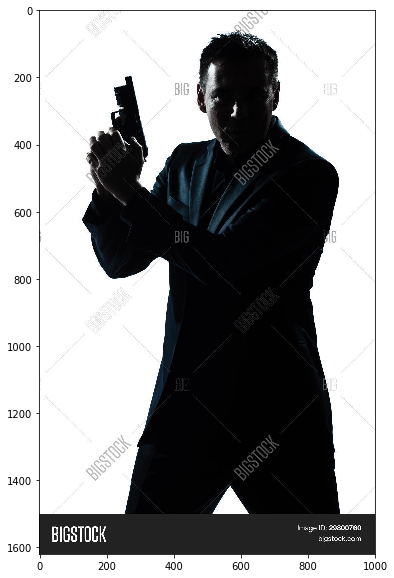

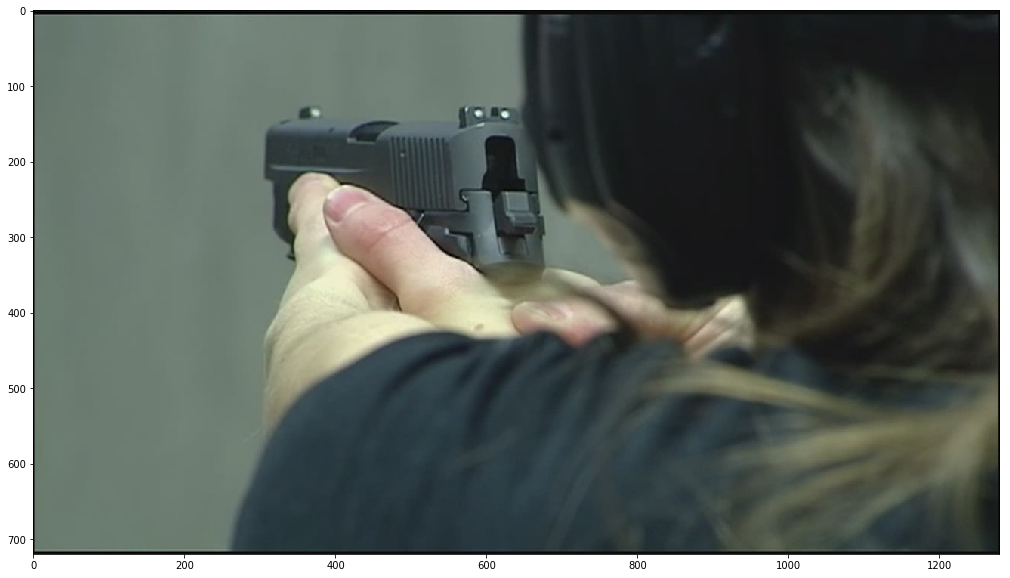

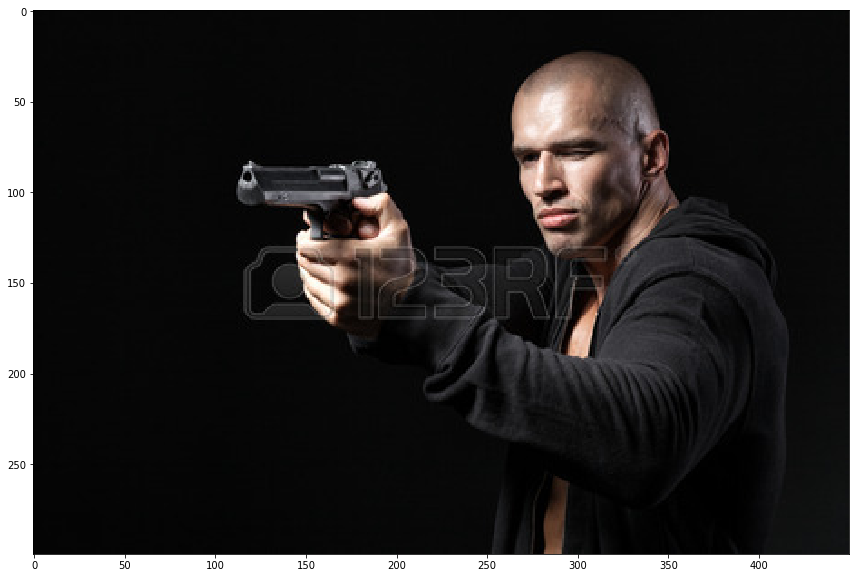

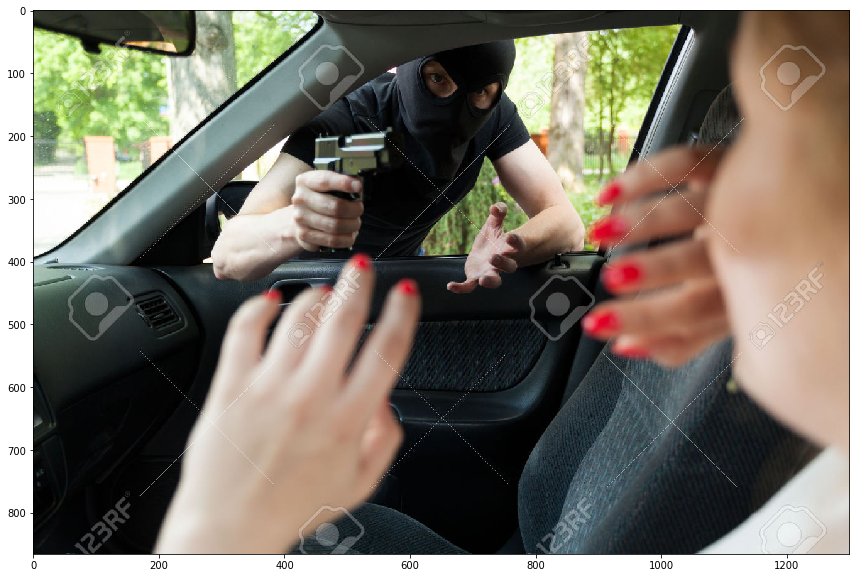

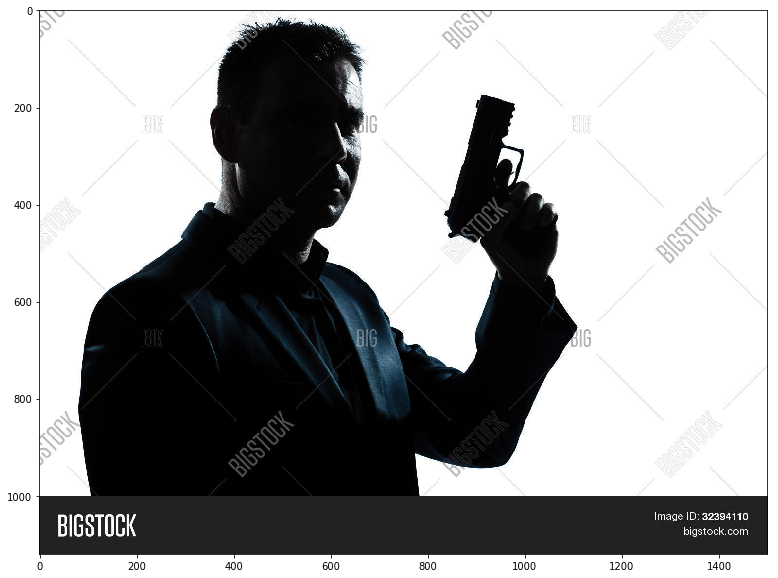

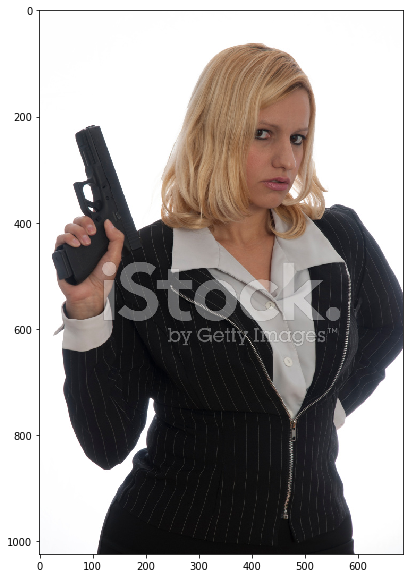

In [16]:
subdir = "testimg"
for entry in os.scandir(subdir):
    if not entry.name.startswith('.') and entry.is_file() and entry.name.split(".")[-1].lower() == "jpg":
        dir = '/'.join([subdir, entry.name])
        img = imageio.imread(dir)

        result = tfnet.return_predict(img)
        print(result)

        _, ax = plt.subplots(figsize=(20, 10))
        ax.imshow(boxing(img, result))

In [22]:
path = pl.Path(r'C:\Users\Martin\OneDrive - Singapore University of Technology and Design\SUTD Term 7\50.035 Computer Vision\1D\darkflow')
os.chdir(path)
options = {"model": "cfg/tiny-yolo-voc-open_images.cfg",
           "load": 1503,
           "gpu": 0.75, #fraction of gpu to use, best is 0.8
           "threshold": 0.0, #set to 0 to show all bboxes
           "trainer" : "adam", #optimisation algorithm
           "lr" : 0.0003, #001, #learning rate
           "epoch" : 1,
           "save" : 1000, #save checkpoint every
           "transfer" : 15, #how many layers not to train
           "train": True,
           "dataset" : "D:/open_images/images", #images
           "annotation" : "D:/open_images/annotations", #ground truths
           "batch" : 40
          }

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-open_images.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |    N   | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |    N   | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |    N   | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |    N   | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |    N   | maxp 2x2p0_2                     | (?, 13, 13, 256)

In [23]:
start = time.time()
tfnet.train()
end = time.time()
print("Training completed in {0:2f} seconds.".format(end-start))


cfg/tiny-yolo-voc-open_images.cfg parsing D:/open_images/annotations
Parsing for ['Person', 'Human face', 'Hat', 'Sunglasses', 'Knife', 'Handgun', 'Rifle', 'Weapon', 'Jacket', 'Shorts', 'Jeans', 'Skirt'] 
[====================>]100%  armas (99).xml.xml
Statistics:
Person: 18268
Human face: 16227
Jacket: 865
Jeans: 1944
Sunglasses: 858
Shorts: 814
Rifle: 218
Hat: 430
Skirt: 123
Handgun: 158
Knife: 38
Weapon: 73
Dataset size: 11022
Dataset of 11022 instance(s)
Training statistics: 
	Learning rate : 0.0003
	Batch size    : 40
	Epoch number  : 1
	Backup every  : 1000
step 1504 - loss 13.346386909484863 - moving ave loss 13.346386909484863
step 1505 - loss 11.665011405944824 - moving ave loss 13.17824935913086
step 1506 - loss 9.76016902923584 - moving ave loss 12.836441326141358
step 1507 - loss 8.863629341125488 - moving ave loss 12.439160127639772
step 1508 - loss 7.749738693237305 - moving ave loss 11.970217984199525
step 1509 - loss 8.028080940246582 - moving ave loss 11.5760042798042

step 1610 - loss 10.843208312988281 - moving ave loss 10.120106684507215
step 1611 - loss 9.802950859069824 - moving ave loss 10.088391101963477
step 1612 - loss 7.990187168121338 - moving ave loss 9.878570708579263
step 1613 - loss 10.572141647338867 - moving ave loss 9.947927802455224
step 1614 - loss 7.1094255447387695 - moving ave loss 9.66407757668358
step 1615 - loss 8.227592468261719 - moving ave loss 9.520429065841393
step 1616 - loss 7.227816581726074 - moving ave loss 9.29116781742986
step 1617 - loss 9.328103065490723 - moving ave loss 9.294861342235947
step 1618 - loss 6.038851261138916 - moving ave loss 8.969260334126243
step 1619 - loss 6.405399322509766 - moving ave loss 8.712874232964596
step 1620 - loss 11.235400199890137 - moving ave loss 8.96512682965715
step 1621 - loss 8.140008926391602 - moving ave loss 8.882615039330595
step 1622 - loss 9.317678451538086 - moving ave loss 8.926121380551344
step 1623 - loss 12.339703559875488 - moving ave loss 9.26747959848376
ste

step 1724 - loss 10.83230209350586 - moving ave loss 9.671595007961626
step 1725 - loss 7.5861406326293945 - moving ave loss 9.463049570428403
step 1726 - loss 7.3456597328186035 - moving ave loss 9.251310586667424
step 1727 - loss 9.516219139099121 - moving ave loss 9.277801441910594
step 1728 - loss 10.453811645507812 - moving ave loss 9.395402462270315
Checkpoint at step 1728
step 1729 - loss 9.597558975219727 - moving ave loss 9.415618113565257
step 1730 - loss 8.968777656555176 - moving ave loss 9.37093406786425
step 1731 - loss 12.554211616516113 - moving ave loss 9.689261822729437
step 1732 - loss 5.434975624084473 - moving ave loss 9.26383320286494
step 1733 - loss 8.408918380737305 - moving ave loss 9.178341720652178
step 1734 - loss 7.643754959106445 - moving ave loss 9.024883044497605
step 1735 - loss 9.632469177246094 - moving ave loss 9.085641657772454
step 1736 - loss 7.796285629272461 - moving ave loss 8.956706054922456
step 1737 - loss 9.920849800109863 - moving ave los

In [29]:
path = pl.Path(r'C:\Users\Martin\OneDrive - Singapore University of Technology and Design\SUTD Term 7\50.035 Computer Vision\1D\darkflow')
os.chdir(path)
options = {"model": "cfg/tiny-yolo-voc-open_images.cfg",
           "load": 1778,
           "gpu": 0.75, #fraction of gpu to use, best is 0.8
           "threshold": 0.0, #set to 0 to show all bboxes
           "trainer" : "sgd", #optimisation algorithm
           "lr" : 0.05, #001, #learning rate
           "epoch" : 1,
           "save" : 80, #save checkpoint every
           "transfer" : 15, #how many layers not to train
           "train": True,
           "dataset" : "D:/open_images/images", #images
           "annotation" : "D:/open_images/annotations", #ground truths
           "batch" : 40
          }

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-open_images.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |    N   | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |    N   | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |    N   | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |    N   | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |    N   | maxp 2x2p0_2                     | (?, 13, 13, 256)

In [30]:
start = time.time()
tfnet.train()
end = time.time()
print("Training completed in {0:2f} seconds.".format(end-start))


cfg/tiny-yolo-voc-open_images.cfg parsing D:/open_images/annotations
Parsing for ['Person', 'Human face', 'Hat', 'Sunglasses', 'Knife', 'Handgun', 'Rifle', 'Weapon', 'Jacket', 'Shorts', 'Jeans', 'Skirt'] 
[====================>]100%  armas (99).xml.xml
Statistics:
Person: 18268
Human face: 16227
Jacket: 865
Jeans: 1944
Sunglasses: 858
Shorts: 814
Rifle: 218
Hat: 430
Skirt: 123
Handgun: 158
Knife: 38
Weapon: 73
Dataset size: 11022
Dataset of 11022 instance(s)
Training statistics: 
	Learning rate : 0.05
	Batch size    : 40
	Epoch number  : 1
	Backup every  : 80
step 1779 - loss 12.791518211364746 - moving ave loss 12.791518211364746
step 1780 - loss 8.747920036315918 - moving ave loss 12.387158393859863
Checkpoint at step 1780
step 1781 - loss 7.609285831451416 - moving ave loss 11.909371137619019
step 1782 - loss 9.532371520996094 - moving ave loss 11.671671175956726
Checkpoint at step 1782
step 1783 - loss 9.830714225769043 - moving ave loss 11.487575480937958
step 1784 - loss 7.35226

KeyboardInterrupt: 

In [36]:
path = pl.Path(r'C:\Users\Martin\OneDrive - Singapore University of Technology and Design\SUTD Term 7\50.035 Computer Vision\1D\darkflow')
os.chdir(path)
options = {"model": "cfg/tiny-yolo-voc-open_images.cfg",
           "load": 1778,
           "gpu": 0.75, #fraction of gpu to use, best is 0.8
           "threshold": 0.0, #set to 0 to show all bboxes
           "trainer" : "adam", #optimisation algorithm
           "lr" : 0.0002, #001, #learning rate
           "epoch" : 5,
           "save" : 1000, #save checkpoint every
           "transfer" : 15, #how many layers not to train
           "train": True,
           "dataset" : "D:/open_images/images", #images
           "annotation" : "D:/open_images/annotations", #ground truths
           "batch" : 40
          }

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-open_images.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |    N   | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |    N   | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |    N   | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |    N   | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |    N   | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |    N   | maxp 2x2p0_2                     | (?, 13, 13, 256)

In [37]:
start = time.time()
tfnet.train()
end = time.time()
print("Training completed in {0:2f} seconds.".format(end-start))


cfg/tiny-yolo-voc-open_images.cfg parsing D:/open_images/annotations
Parsing for ['Person', 'Human face', 'Hat', 'Sunglasses', 'Knife', 'Handgun', 'Rifle', 'Weapon', 'Jacket', 'Shorts', 'Jeans', 'Skirt'] 
[====================>]100%  armas (99).xml.xml
Statistics:
Person: 18268
Human face: 16227
Jacket: 865
Jeans: 1944
Sunglasses: 858
Shorts: 814
Rifle: 218
Hat: 430
Skirt: 123
Handgun: 158
Knife: 38
Weapon: 73
Dataset size: 11022
Dataset of 11022 instance(s)
Training statistics: 
	Learning rate : 0.0002
	Batch size    : 40
	Epoch number  : 5
	Backup every  : 1000
step 1779 - loss 8.482597351074219 - moving ave loss 8.482597351074219
step 1780 - loss 11.841504096984863 - moving ave loss 8.818488025665284
step 1781 - loss 7.382012367248535 - moving ave loss 8.674840459823608
step 1782 - loss 12.022693634033203 - moving ave loss 9.009625777244569
step 1783 - loss 8.57036304473877 - moving ave loss 8.965699503993989
step 1784 - loss 9.797492027282715 - moving ave loss 9.048878756322862
st

KeyboardInterrupt: 